In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
# import cvs from the last exercise with all changes and merges
df = pd.read_csv('citibike_sample_1pct_2.3.csv', index_col = 0, header=0, low_memory=False)

In [3]:
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,year_month,bike_rides_daily,merge_test
day,,,,,,,,,,,,,,,,,
2022-01-01,E119215C06036EFC,electric_bike,2022-01-01 07:37:20.940,2022-01-01 07:43:59.077,Madison Ave & E 99 St,7443.01,E 77 St & 3 Ave,7092.06,40.789485,-73.952429,40.773142,-73.958562,member,11.6,2022-01,224,both
2022-01-01,1EF6CB2034F8FCE3,electric_bike,2022-01-01 16:43:19.018,2022-01-01 18:11:01.656,W 100 St & Broadway,7580.01,E Tremont Ave & Jerome Ave,8403.02,40.797372,-73.970412,40.851747,-73.908964,member,11.6,2022-01,224,both
2022-01-01,0AA3FF0FF8EF4907,classic_bike,2022-01-01 02:25:45.733,2022-01-01 02:39:13.801,Bedford Ave & Bergen St,4066.15,Broadway & Madison St,4483.10,40.676368,-73.952918,40.688220,-73.919660,casual,11.6,2022-01,224,both
2022-01-01,D05A593BFE9697D3,classic_bike,2022-01-01 00:47:43.550,2022-01-01 00:54:55.615,Grand Army Plaza & Central Park S,6839.10,E 58 St & 3 Ave,6762.02,40.764397,-73.973715,40.760958,-73.967245,casual,11.6,2022-01,224,both
2022-01-01,B77667F236053C94,classic_bike,2022-01-01 00:13:02.530,2022-01-01 00:20:19.315,Westchester Ave & Southern Blvd,8004.03,Southern Blvd & E 175 St,8196.02,40.824956,-73.891677,40.839335,-73.886445,casual,11.6,2022-01,224,both


In [4]:
# style-theme
sns.set_theme(style= "whitegrid", palette= "Blues_r")

In [5]:
# define most frequented stations
df['value'] = 1

df_stations = (
    df.groupby('start_station_name')['value']
      .count()
      .reset_index()
)

In [6]:
df_stations

,start_station_name,value
0,1 Ave & E 110 St,220
1,1 Ave & E 16 St,672
2,1 Ave & E 18 St,705
3,1 Ave & E 30 St,460
4,1 Ave & E 39 St,503
...,...,...
1728,Wyckoff Ave & Gates Ave,171
1729,Wyckoff St & 3 Ave,1
1730,Wyckoff St & Nevins St,128
1731,Wythe Ave & Metropolitan Ave,651


In [7]:
# top 20 most frequented stations
top20 = df_stations.nlargest(20, 'value')

In [8]:
top20

,start_station_name,value
1690,West St & Chambers St,1289
1560,W 21 St & 6 Ave,1282
490,Broadway & W 58 St,1125
284,6 Ave & W 33 St,1111
8,1 Ave & E 68 St,1054
456,Broadway & E 14 St,1028
458,Broadway & E 21 St,1016
480,Broadway & W 25 St,1004
1485,University Pl & E 14 St,993
779,E 33 St & 1 Ave,960


In [9]:
# since the defined styletheme does not apply in this case (all stations from the same variable) the colours need to be defined extra
palette = sns.color_palette("Blues_r", n_colors=len(top20))

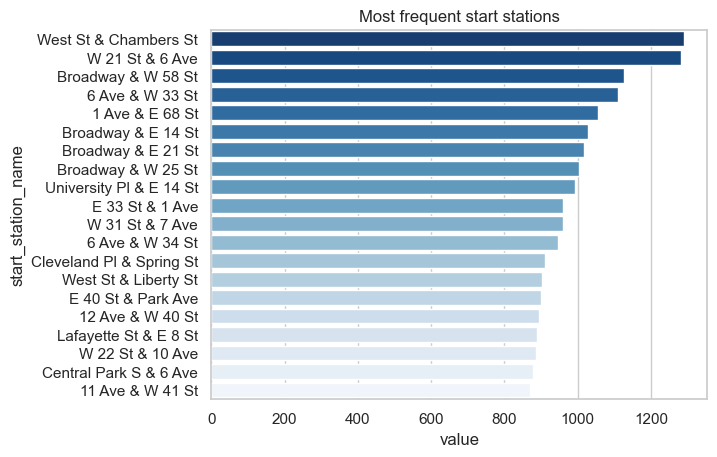

In [10]:
# create barplot
sns.barplot(
    data=top20,
    x='value',
    y='start_station_name',
    hue='start_station_name', palette=palette,
    dodge=False
)
plt.legend([], [], frameon=False)  # Legende ausblenden
plt.title("Most frequent start stations")
plt.show()

# Dual Line Chart with seaborn

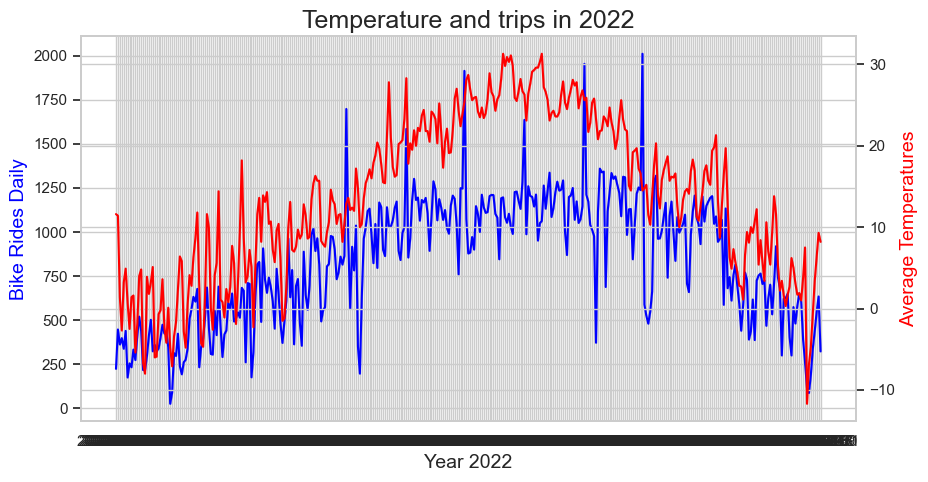

In [11]:
# crate a dual axis in this case twin axis

fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df['bike_rides_daily'], color = "b")

ax.set_xlabel ("Year 2022", fontsize =14)
ax.set_ylabel("Bike Rides Daily", color = "blue",fontsize=14)

ax2 = ax.twinx()


sns.lineplot(data = df['avgTemp'], color = "r")
ax2.set_ylabel("Average Temperatures", color = "red",fontsize=14) # set lables
plt.title('Temperature and trips in 2022', fontsize = 18) # set title
plt.show()

# Boxplots

In [12]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'year_month', 'bike_rides_daily',
       'merge_test', 'value'],
      dtype='object')

COMMENT: as far as I can see there are only two categorical variables which can be used for this task: the "member type" and the "rideable type". 
And only the "bike rides daily" make somehow sense as a numerical variable for the y axis. 
But in both cases the boxplot is not the ideal visualization for the data, since the daily bike rides are not very informative in a statistical sense and in terms of distribution.  
I chose the example of the member type: the members have a biger distribution (bigger box) that means they use the bikes on more different days (days with different amount of bikerides - so also if the weather is noct perfect)
The Causals use the bikes more on days with similar amount of bike rides (smaller box means smaller distribution)  
In practice: all of them rather on the couple of days with perfect weather

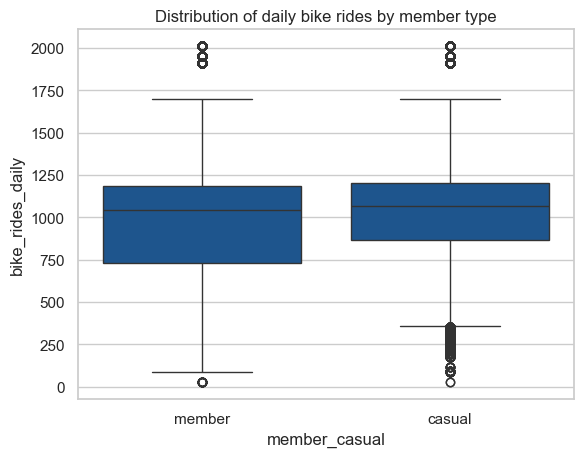

In [13]:

sns.set_theme(style="whitegrid", palette="Blues_r")

sns.boxplot(
    data=df,
    x='member_casual',      
    y='bike_rides_daily'     
)

plt.title("Distribution of daily bike rides by member type")
plt.show()

# FacetGrids

In [22]:
# aggregate sum of rides per day and rideable type: each line = one ride
df_daily = df.groupby(['rideable_type', 'day']).size().reset_index(name='bike_rides_daily')


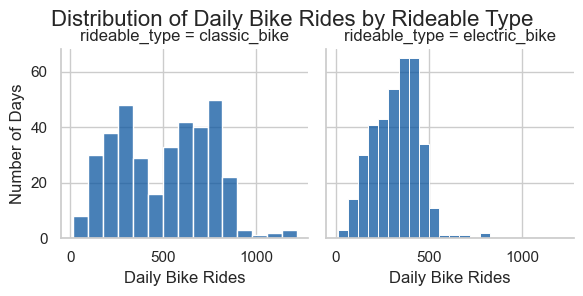

In [23]:
# create FacetGrids 
grid = sns.FacetGrid(df_daily, col="rideable_type", sharex=True, sharey=True)
grid.map(sns.histplot, "bike_rides_daily", bins=15)
grid.set_axis_labels("Daily Bike Rides", "Number of Days")
grid.fig.suptitle("Distribution of Daily Bike Rides by Rideable Type", fontsize=16)
grid.fig.tight_layout()
grid.fig.subplots_adjust(top=0.85)

plt.show()


COMMENT: it took a whil until the aggregation was in a way that the result really made sense.
What we can see: the classic bikes are used more regularly. There are lot of days (quite regular distributet bars) on days with very different bike frequency.
While the electric bike are uses a lot (many days) on days with certain or similat bike frequency.

Same in the second example: The casuals use the bikes a lot on days with a mor similar amount of bikerides (coud be the weekends) while the memebrs use the bikes 
regularly on days with very differend bike conditiond (= higher or lower amiount of bikerides)


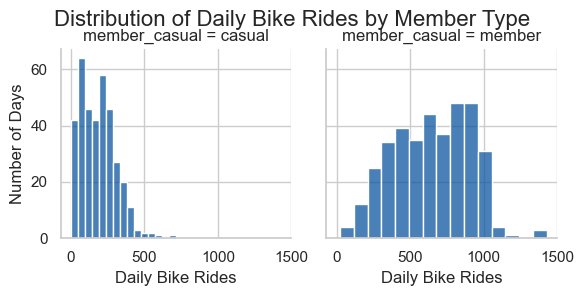

In [25]:
# aggregate sum of rides per day and rideable type: each line = one ride
df_daily_customers = df.groupby(['member_casual', 'day']).size().reset_index(name='bike_rides_daily')

grid = sns.FacetGrid(df_daily_customers, col="member_casual", sharex=True, sharey=True)
grid.map(sns.histplot, "bike_rides_daily", bins=15)
grid.set_axis_labels("Daily Bike Rides", "Number of Days")
grid.fig.suptitle("Distribution of Daily Bike Rides by Member Type", fontsize=16)
grid.fig.tight_layout()
grid.fig.subplots_adjust(top=0.85)

plt.show()

In [29]:
# BONUS: what about the question if casuals or memebers prefer electric or classic bikes?

# each line = one ride
df_daily_type = df.groupby(['member_casual', 'rideable_type', 'day']).size().reset_index(name='bike_rides_daily')

print(df_daily_type.head())


  member_casual rideable_type         day  bike_rides_daily
0        casual  classic_bike  2022-01-01                43
1        casual  classic_bike  2022-01-02                69
2        casual  classic_bike  2022-01-03                18
3        casual  classic_bike  2022-01-04                35
4        casual  classic_bike  2022-01-05                21


In [27]:
df_total = df_daily_type.groupby(['member_casual', 'rideable_type'])['bike_rides_daily'].sum().reset_index()
print(df_total)


  member_casual  rideable_type  bike_rides_daily
0        casual   classic_bike             42974
1        casual  electric_bike             25065
2        member   classic_bike            141600
3        member  electric_bike             93995


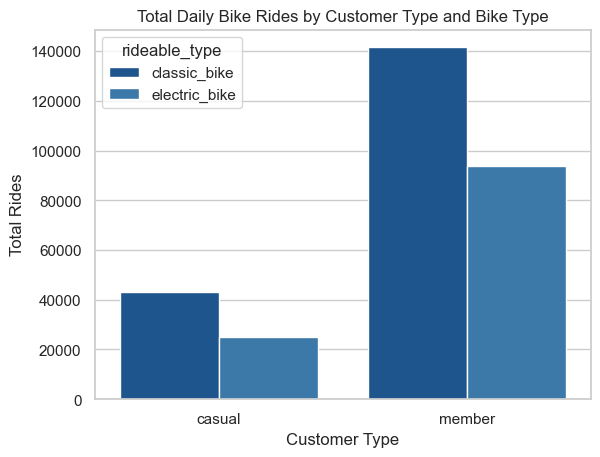

In [28]:
sns.set_theme(style="whitegrid", palette="Blues_r")

sns.barplot(
    data=df_total,
    x='member_casual',
    y='bike_rides_daily',
    hue='rideable_type'
)

plt.title("Total Daily Bike Rides by Customer Type and Bike Type")
plt.ylabel("Total Rides")
plt.xlabel("Customer Type")
plt.show()
